In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error, 
                             mean_squared_error, 
                             r2_score)

In [ ]:
FinalBattingData = pd.read_pickle("/content/drive/MyDrive/Pickle Files/FinalBattingData.pkl")


FinalBattingData2022 = pd.read_pickle("/content/drive/MyDrive/Pickle Files/FinalBattingData2022.pkl")


FinalPitchingData = pd.read_pickle("/content/drive/MyDrive/Pickle Files/FinalPitchingData.pkl")


FinalPitchingData2022 = pd.read_pickle("/content/drive/MyDrive/Pickle Files/FinalPitchingData2022.pkl")


FinalCombinedData = pd.read_csv("/content/drive/MyDrive/Pickle Files/FINALCOMBINEDDATA.csv")


FinalCombinedData2022 = pd.read_csv("/content/drive/MyDrive/Pickle Files/FINALCOMBINEDDATA2022.csv")

In [ ]:
FinalCombinedData.fillna(value = 0, inplace = True)

In [ ]:
FinalCombinedData2022.fillna(value = 0, inplace = True)

In [ ]:
GroupedFinalCombinedDataSize = FinalCombinedData.groupby(by = ['team_ID_y', 'year_ID', 'WinPercent']).size()

In [ ]:
GroupedFinalCombinedDataMean = FinalCombinedData.groupby(by = ['team_ID_y', 'year_ID', 'WinPercent']).mean()

<ipython-input-6-bfa080d78ae6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  GroupedFinalCombinedDataMean = FinalCombinedData.groupby(by = ['team_ID_y', 'year_ID', 'WinPercent']).mean()


In [ ]:
GroupedFinalCombinedDataMean = GroupedFinalCombinedDataMean[GroupedFinalCombinedDataSize > 10]

In [ ]:
GroupedFinalCombinedDataSize2022 = FinalCombinedData2022.groupby(by = ['team_ID_y', 'year_ID', 'WinPercent']).size()

In [ ]:
GroupedFinalCombinedDataMean2022 = FinalCombinedData2022.groupby(by = ['team_ID_y', 'year_ID', 'WinPercent']).mean()

<ipython-input-9-b986bfb8b1fc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  GroupedFinalCombinedDataMean2022 = FinalCombinedData2022.groupby(by = ['team_ID_y', 'year_ID', 'WinPercent']).mean()


In [ ]:
GroupedFinalCombinedDataMean2022 = GroupedFinalCombinedDataMean2022[GroupedFinalCombinedDataSize2022 > 10]

In [ ]:
GroupedFinalCombinedDataMean.reset_index(inplace = True)

In [ ]:
GroupedFinalCombinedDataMean2022.reset_index(inplace = True)

**TEAM WIN PERCENT PREDICTIONS**

In [ ]:
Xteam = GroupedFinalCombinedDataMean[['WAR', 'GS', 'W',
       'L', 'SV', 'IP', 'H', 'ER', 'BB', 'SO', 'HR', 'HBP', 'ERA', 'AB', '2B',
       '3B', 'IBB', 'GDP', 'SF', 'SB', 'CS', 'PO', 'BF', 'Str', 'StL', 'StS',
       'GB/FB', 'LD', 'PU', 'WHIP', 'BAbip', 'SO9', 'SO/W', 'PA', 'R', 'H.1',
       '2B.1', '3B.1', 'HR.1', 'RBI', 'BB.1', 'IBB.1', 'SO.1', 'HBP.1', 'SH',
       'SF.1', 'GDP.1', 'SB.1', 'CS.1', 'BA', 'OPS']]

yteam = GroupedFinalCombinedDataMean['WinPercent']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xteam, yteam, test_size=0.2, random_state=101)



In [ ]:
lmTeam = LinearRegression()


In [ ]:
lmTeam.fit(X_train, y_train)


LinearRegression()

In [ ]:
predictionsTeam = lmTeam.predict(X_test)



In [ ]:
coeff_df = pd.DataFrame(data = lmTeam.coef_, index = Xteam.columns, columns = ['Coefficient'])


coeff_df

Coefficient
WAR       0.003869
GS        0.021982
W         0.110441
L        -0.097515
SV        0.016454
IP        0.018344
H         0.003326
ER       -0.001315
BB        0.006945
SO       -0.000767
HR        0.000586
HBP       0.000702
ERA       0.001791
AB        0.001284
2B        0.005624
3B       -0.008941
IBB       0.007104
GDP      -0.007073
SF        0.008400
SB        0.002566
CS       -0.002482
PO        0.003936
BF       -0.007438
Str       0.243621
StL       0.051957
StS      -0.340123
GB/FB    -0.111700
LD        0.013214
PU       -0.505787
WHIP     -0.023080
BAbip     0.198238
SO9       0.006917
SO/W     -0.005250
PA        0.000175
R         0.004994
H.1      -0.001964
2B.1      0.000796
3B.1     -0.001381
HR.1     -0.003152
RBI      -0.001083
BB.1     -0.001375
IBB.1     0.003127
SO.1      0.000191
HBP.1     0.003095
SH       -0.003793
SF.1     -0.008606
GDP.1     0.002462
SB.1      0.001309
CS.1     -0.006169
BA        0.015576
OPS       0.098221

In [ ]:
from sklearn.metrics import (mean_absolute_error, 
                             mean_squared_error, 
                             r2_score)

print('R2:',r2_score(y_test, predictionsTeam))

R2: 0.9412192070673105


In [ ]:
Xteam2022 = GroupedFinalCombinedDataMean2022[['WAR', 'GS', 'W',
       'L', 'SV', 'IP', 'H', 'ER', 'BB', 'SO', 'HR', 'HBP', 'ERA', 'AB', '2B',
       '3B', 'IBB', 'GDP', 'SF', 'SB', 'CS', 'PO', 'BF', 'Str', 'StL', 'StS',
       'GB/FB', 'LD', 'PU', 'WHIP', 'BAbip', 'SO9', 'SO/W', 'PA', 'R', 'H.1',
       '2B.1', '3B.1', 'HR.1', 'RBI', 'BB.1', 'IBB.1', 'SO.1', 'HBP.1', 'SH',
       'SF.1', 'GDP.1', 'SB.1', 'CS.1', 'BA', 'OPS']]

yteam2022 = GroupedFinalCombinedDataMean2022['WinPercent']

In [ ]:
predictionsTeam2022 = lmTeam.predict(Xteam2022)

In [ ]:
print('R2:',r2_score(yteam2022, predictionsTeam2022))

R2: 0.9459930852987658


In [ ]:
GroupedFinalCombinedDataMean2022['predicted_WinPercent'] = predictionsTeam2022

TeamPredictions2022 = pd.DataFrame(data = GroupedFinalCombinedDataMean2022[['team_ID_y','WinPercent', 'predicted_WinPercent']])

In [ ]:
TeamPredictions2022

team_ID_y  WinPercent  predicted_WinPercent
0        ARI       0.457              0.461734
1        ATL       0.623              0.646447
2        BAL       0.512              0.506667
3        BOS       0.481              0.482840
4        CHC       0.457              0.473548
5        CHW       0.500              0.524738
6        CIN       0.383              0.405077
7        CLE       0.568              0.572182
8        COL       0.420              0.433434
9        DET       0.407              0.404466
10       HOU       0.654              0.620831
11       KCR       0.401              0.391346
12       LAA       0.451              0.449046
13       LAD       0.685              0.670729
14       MIA       0.426              0.453137
15       MIL       0.531              0.514172
16       MIN       0.481              0.471529
17       NYM       0.623              0.599095
18       NYY       0.611              0.580889
19       OAK       0.370              0.428450
20       PHI       0.537              0.533086
21       PIT       0.383              0.388544
22       SDP       0.549              0.553506
23       SEA       0.556              0.538043
24       SFG       0.500              0.507557
25       STL       0.574              0.535143
26       TBR       0.531              0.528298
27       TEX       0.420              0.423878
28       TOR       0.568              0.603334
29       WSN       0.340              0.344629

**BATTING WAR PREDICTION**

In [ ]:
XBatting = FinalBattingData[['PA', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'HBP', 'SH', 'SF', 'GDP',
                     'SB', 'CS', 'BA', 'OPS']]

yBatting = FinalBattingData['WAR']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XBatting, yBatting, test_size=0.2, random_state=101)



In [ ]:
lmBatting = LinearRegression()


In [ ]:
lmBatting.fit(X_train, y_train)


LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(data = lmBatting.coef_, index = XBatting.columns, columns = ['Coefficient'])


coeff_df

Coefficient
PA     -0.019154
R       0.013861
H       0.061259
2B      0.033278
3B      0.067439
HR      0.068798
RBI    -0.002047
BB      0.042113
SO     -0.004804
HBP     0.064182
SH      0.081921
SF      0.019247
GDP    -0.024742
SB      0.029626
CS     -0.047876
BA     -0.629577
OPS    -0.014117

In [ ]:
predictionsBatting = lmBatting.predict(X_test)



Text(0, 0.5, 'Predicted')

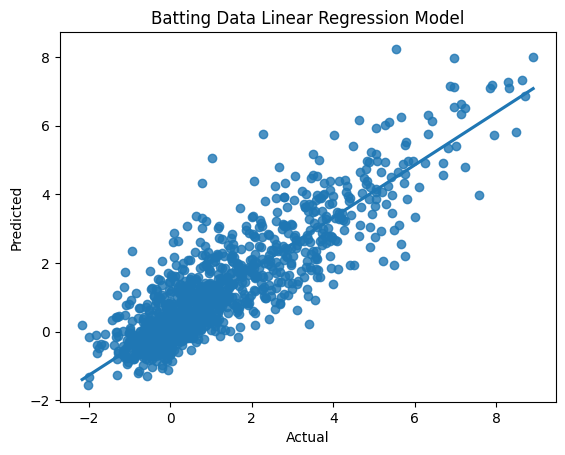

In [ ]:
sns.regplot(x = y_test, y = predictionsBatting, ci = None)
plt.title("Batting Data Linear Regression Model")
plt.xlabel('Actual')
plt.ylabel('Predicted')


In [ ]:
print('R2:',r2_score(y_test, predictionsBatting))

R2: 0.7743842493966206


In [ ]:
XBatting2022 = FinalBattingData2022[['PA', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'HBP', 'SH', 'SF', 'GDP',
                     'SB', 'CS', 'BA', 'OPS']]

yBatting2022 = FinalBattingData2022['WAR']

In [ ]:
predictionsBatting2022 = lmBatting.predict(XBatting2022)

In [ ]:
print('R2:',r2_score(yBatting2022, predictionsBatting2022))

R2: 0.7127600794596716


In [ ]:
FinalBattingData2022['predicted_WAR'] = predictionsBatting2022

BattingPredictionsDF = pd.DataFrame(data = FinalBattingData2022[['Name_x','WAR', 'predicted_WAR']])

In [ ]:
BattingPredictionsDF

Name_x   WAR  predicted_WAR
0           CJ Abrams  0.10       0.126082
1    Sergio Alcantara -0.20      -0.253875
2        Jorge Alfaro  0.84      -0.070494
3         Jose Azocar  0.10      -0.143138
4      Matthew Batten -0.10      -0.161823
..                ...   ...            ...
782      Luis Torrens  0.09      -0.522303
783   Taylor Trammell  0.31       0.122970
784      Justin Upton -0.34      -0.318169
785    Donovan Walton  0.00      -0.359327
787      Jesse Winker -0.25       0.778786

[676 rows x 3 columns]

**PITCHING WAR PREDICTIONS**

In [ ]:
Xpitching = FinalPitchingData[['W', 'L', 'SV', 'IP', 'H', 'ER', 'BB', 'SO',
       'HR', 'HBP', 'ERA', 'AB', '2B', '3B', 'IBB', 'GDP', 'SF', 'SB', 'CS',
       'PO', 'BF', 'Str', 'StL', 'StS', 'GB/FB', 'LD', 'PU', 'WHIP', 'BAbip',
       'SO9', 'SO/W']]

ypitching = FinalPitchingData['WAR']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xpitching, ypitching, test_size=0.2, random_state=101)



In [ ]:
lmPitching = LinearRegression()


In [ ]:
lmPitching.fit(X_train, y_train)


LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(data = lmPitching.coef_, index = Xpitching.columns, columns = ['Coefficient'])


coeff_df

Coefficient
W         0.021768
L        -0.025714
SV        0.003194
IP        0.125199
H         0.018255
ER       -0.073334
BB        0.055225
SO        0.007297
HR        0.006847
HBP       0.054308
ERA       0.010287
AB        0.033349
2B       -0.001107
3B        0.014632
IBB      -0.029222
GDP      -0.006848
SF        0.019189
SB       -0.006077
CS       -0.039608
PO        0.028920
BF       -0.059347
Str      -0.247512
StL      -0.751323
StS      -0.399689
GB/FB    -0.013142
LD       -0.397467
PU        0.537573
WHIP      0.201125
BAbip    -0.019628
SO9      -0.024397
SO/W      0.016983

In [ ]:
predictionsPitching = lmPitching.predict(X_test)



Text(0, 0.5, 'Predicted')

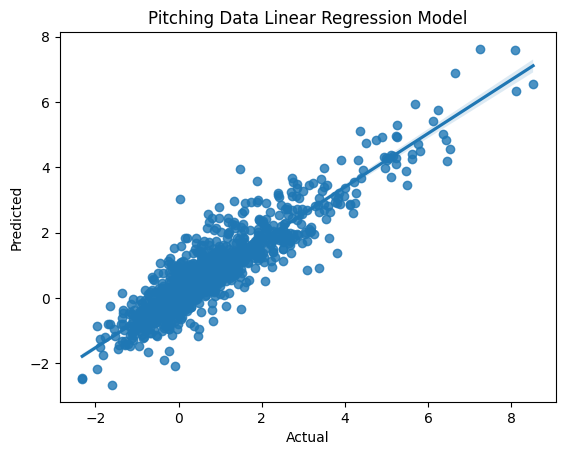

In [ ]:
sns.regplot(x = y_test, y = predictionsPitching)
plt.title("Pitching Data Linear Regression Model")
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
print('R2:',r2_score(y_test, predictionsPitching))

R2: 0.8324509422762068


In [ ]:
XPitching2022 = FinalPitchingData2022[['W', 'L', 'SV', 'IP', 'H', 'ER', 'BB', 'SO',
       'HR', 'HBP', 'ERA', 'AB', '2B', '3B', 'IBB', 'GDP', 'SF', 'SB', 'CS',
       'PO', 'BF', 'Str', 'StL', 'StS', 'GB/FB', 'LD', 'PU', 'WHIP', 'BAbip',
       'SO9', 'SO/W']]


yPitching2022 = FinalPitchingData2022['WAR']

In [ ]:
predictionsPitching2022 = lmPitching.predict(XPitching2022)

In [ ]:
print('R2:',r2_score(yPitching2022, predictionsPitching2022))

R2: 0.8216161979005454


In [ ]:
FinalPitchingData2022['predicted_WAR'] = predictionsPitching2022

PitchingPredictionsDF = pd.DataFrame(data = FinalPitchingData2022[['Name_x','WAR', 'predicted_WAR']])

In [ ]:
PitchingPredictionsDF

Name_x   WAR  predicted_WAR
0       Cory Abbott -0.04      -0.084056
1         Joan Adon -1.24      -1.395753
3      Victor Arano -0.71       0.082651
5      Steve Cishek  0.32       0.523737
8    Patrick Corbin -2.40      -1.905957
..              ...   ...            ...
960     Noe Ramirez -0.82      -0.035768
961     Caleb Smith  0.13       0.784310
963     Luke Weaver -0.40      -0.600384
964    JB Wendelken -0.34      -0.012834
965  Taylor Widener  0.18       0.054537

[636 rows x 3 columns]

**Need to copy all code over to the application part and have it run within the for loops**

In [ ]:
FinalBattingData2022.columns


Index(['Name_x', 'Age', 'PA', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'IBB',
       'SO', 'HBP', 'SH', 'SF', 'GDP', 'SB', 'CS', 'BA', 'OPS', 'mlb_ID',
       'year_ID', 'player_ID', 'WAR', 'team_ID_y', 'WinPercent',
       'predicted_WAR'],
      dtype='object')

In [ ]:
FinalPitchingData2022.columns

Index(['Name_x', 'Age', 'GS', 'W', 'L', 'SV', 'IP', 'H', 'ER', 'BB', 'SO',
       'HR', 'HBP', 'ERA', 'AB', '2B', '3B', 'IBB', 'GDP', 'SF', 'SB', 'CS',
       'PO', 'BF', 'Str', 'StL', 'StS', 'GB/FB', 'LD', 'PU', 'WHIP', 'BAbip',
       'SO9', 'SO/W', 'mlb_ID', 'year_ID', 'player_ID', 'WAR', 'team_ID_y',
       'WinPercent', 'predicted_WAR'],
      dtype='object')